<a href="https://colab.research.google.com/github/saifullahAnsari0001/Face-Swap/blob/main/Face_swap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mounting Google Drive:**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Installing Libraries:**

In [19]:
!pip install -U insightface
!pip install onnxruntime

## **Importing Libraries:**

In [20]:
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

## **Model and App Setup:**

In [21]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

swapper = insightface.model_zoo.get_model('/content/drive/MyDrive/insightface/models/inswapper_128.onnx',
                                          download=False,
                                          download_zip=False)

/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)
Applied prov

## **Loading Images and Detecting Faces:**

In [22]:
source_img_path = '/content/drive/MyDrive/insightface/models/source_img.jpg'  # Replace with the actual path
source_img = cv2.imread(source_img_path)


target_img_path = '/content/drive/MyDrive/insightface/models/target_img.jpg'  # Replace with the actual path
target_img = cv2.imread(target_img_path)

source_face = app.get(source_img)[0]
target_face = app.get(target_img)[0]

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


## **Face Swapping:**

In [23]:
result = target_img.copy()
result_type = swapper.get(result, target_face, source_face, paste_back=True)

## **Visualization**

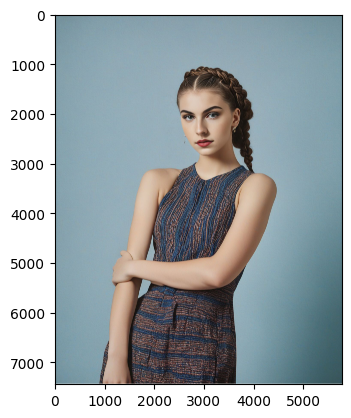

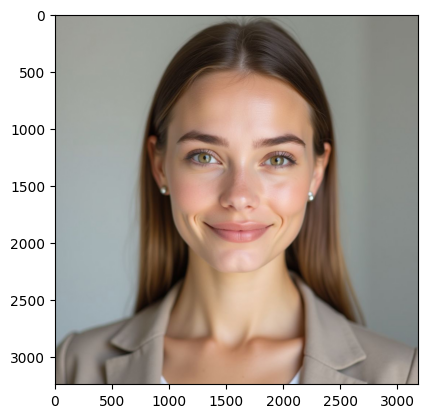

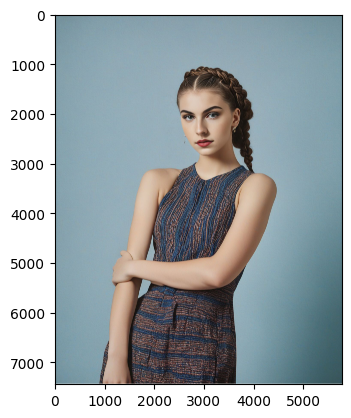

In [24]:
plt.imshow(target_img[:,:,::-1])
plt.show()
plt.imshow(source_img[:,:,::-1])
plt.show()
plt.imshow(result[:,:,::-1])
plt.show()